# H1N1 and Seasonal Flu Vaccines Classifications
As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Your audience could be someone guiding those public health efforts.

This challenge: can you predict whether people got H1N1 and seasonal flu vaccines using data collected in the National 2009 H1N1 Flu Survey? This is a binary classification problem, but there are two potential targets: 
1. whether the survey respondent received the seasonal flu vaccine
2. whether the respondent received the H1N1 flu vaccine

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


In [74]:
test_df = pd.read_csv('test_set_features.csv')
features_df = pd.read_csv('training_set_features.csv')
labels_df = pd.read_csv('training_set_labels.csv')

In [75]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

In [76]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [77]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


In [78]:
# merging the three dataframes
merged_df = features_df.merge(labels_df, on='respondent_id')
merged_df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [79]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [80]:
merged_df.columns

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [81]:
# checking missing values
missing = merged_df.isna().sum().to_frame().sort_values(0,ascending = False)
missing

,0
employment_occupation,13470
employment_industry,13330
health_insurance,12274
income_poverty,4423
doctor_recc_h1n1,2160
doctor_recc_seasonal,2160
rent_or_own,2042
employment_status,1463
marital_status,1408
education,1407


### Handling missing values

In [82]:
# dropping high missing values
merged_df.drop(['employment_industry', 'employment_occupation'], axis=1, inplace=True)
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [83]:
# filling categorical features with unknown
categorical_fill = [
    'education', 'income_poverty', 'marital_status',
    'rent_or_own', 'employment_status'
]

for col in categorical_fill:
    merged_df[col] = merged_df[col].fillna('Unknown')

In [91]:
# fill binary flags with 0
binary_fill_0 = [
    'doctor_recc_h1n1', 'doctor_recc_seasonal', 
    'health_worker', 'chronic_med_condition',
    'child_under_6_months', 'health_insurance'
]

for col in binary_fill_0:
    merged_df[col] = merged_df[col].fillna(0)

In [92]:
# fill opinion and behavioral columns with mode
from sklearn.impute import SimpleImputer

opinion_behavioral_cols = [
    'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
    'behavioral_antiviral_meds', 'behavioral_avoidance', 
    'behavioral_face_mask', 'behavioral_wash_hands', 
    'behavioral_large_gatherings', 'behavioral_outside_home', 
    'behavioral_touch_face'
]
mode_imputer = SimpleImputer(strategy='most_frequent')
merged_df[opinion_behavioral_cols] = mode_imputer.fit_transform(merged_df[opinion_behavioral_cols])

In [93]:
# Fill ordinal columns with mode
ordinal_cols = ['h1n1_concern', 'h1n1_knowledge']
merged_df[ordinal_cols] = mode_imputer.fit_transform(merged_df[ordinal_cols])

In [94]:
#Fill household size columns with median
household_cols = ['household_adults', 'household_children']
median_imputer = SimpleImputer(strategy='median')
merged_df[household_cols] = median_imputer.fit_transform(merged_df[household_cols])

In [ ]:
# Check for any remaining missing values
remaining_missing = merged_df.isnull().sum().sum()
print(f"Remaining missing values: {remaining_missing}")

Remaining missing values: 0


## Exploratory Data Analysis

In [85]:
numerical_features = [
    'h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
    'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
    'behavioral_large_gatherings', 'behavioral_outside_home',
    'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
    'chronic_med_condition', 'child_under_6_months', 'health_worker',
    'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
    'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
    'opinion_seas_risk', 'opinion_seas_sick_from_vacc',
    'household_adults', 'household_children'
]

categorical_features =  [
    'age_group', 'education', 'race', 'sex', 'income_poverty',
    'marital_status', 'rent_or_own', 'employment_status',
    'hhs_geo_region', 'census_msa'
]

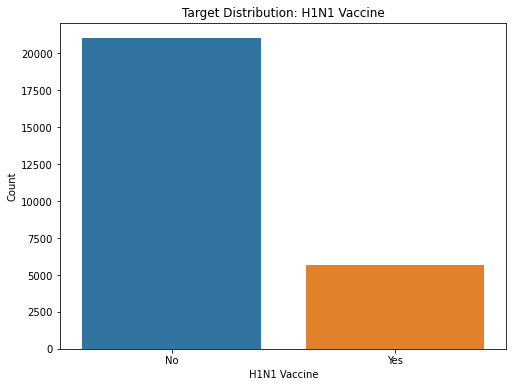

In [86]:
# 1. Class Imbalance
import seaborn as sns
plt.figure(figsize=(8,6))
sns.countplot(x=merged_df['h1n1_vaccine'], data=merged_df)
plt.title('Target Distribution: H1N1 Vaccine')
plt.xticks([0,1], ['No', 'Yes'])
plt.ylabel('Count')
plt.xlabel('H1N1 Vaccine')
plt.show()

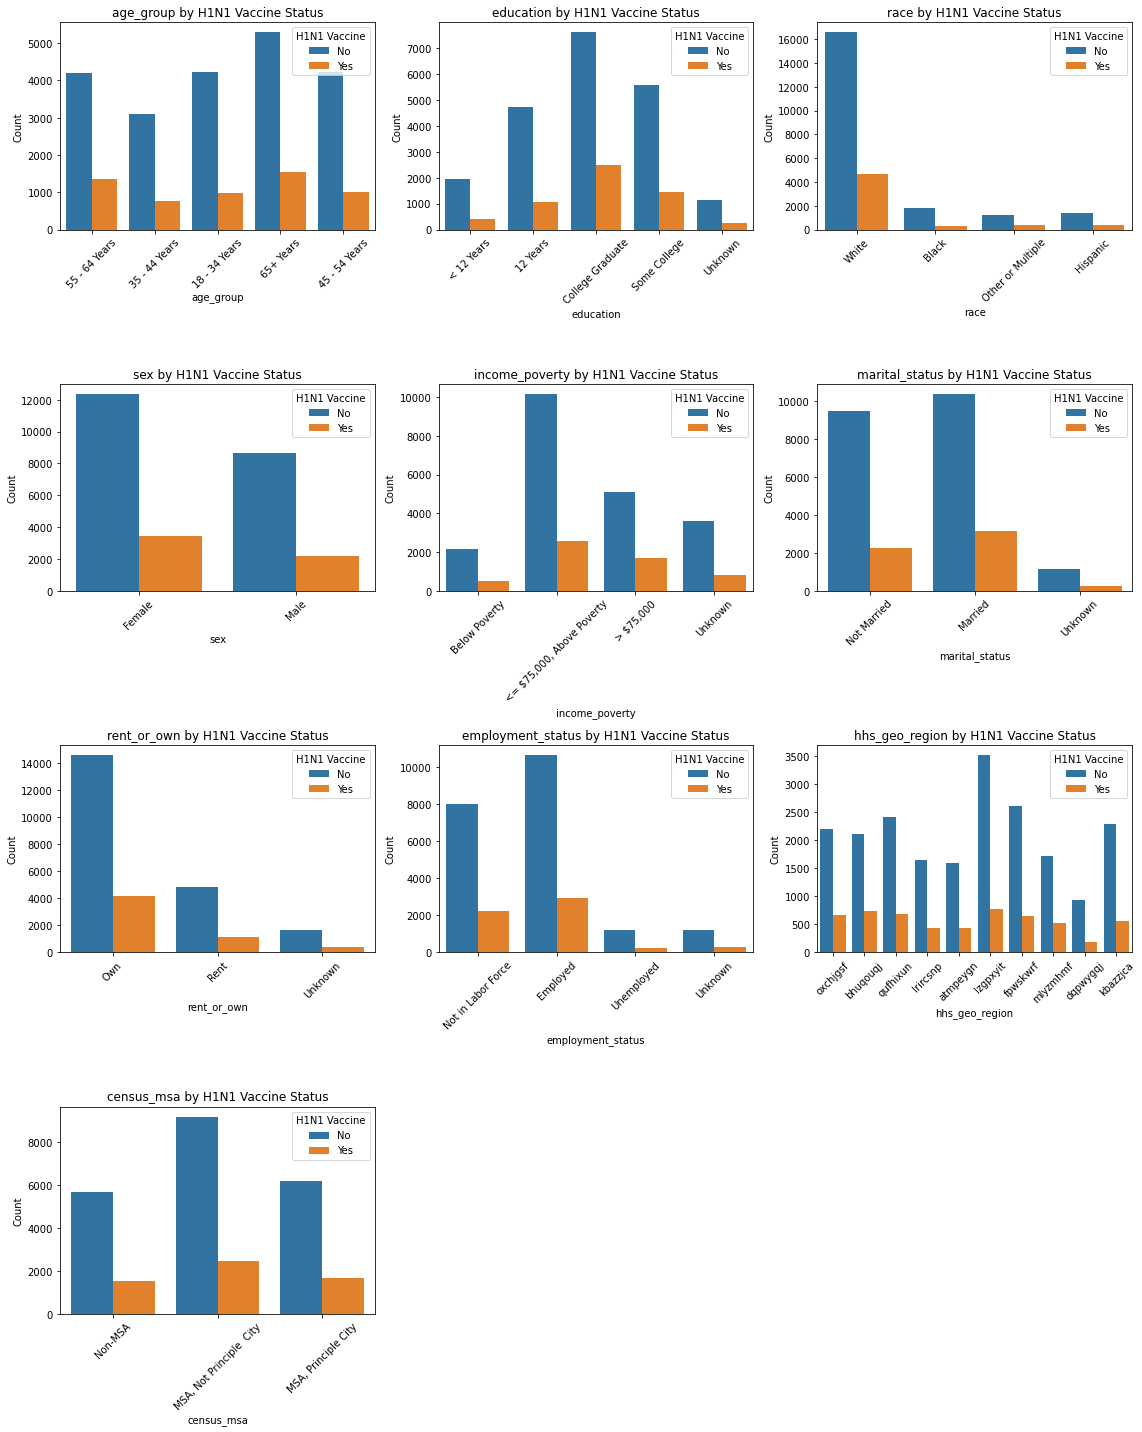

In [87]:
import math

# Calculate the number of rows and columns needed
num_features = len(categorical_features)
cols = 3  
rows = math.ceil(num_features / cols)

# Create the subplots
fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()

# Loop through each categorical feature and plot
for i, col in enumerate(categorical_features):
    sns.countplot(x=col, hue='h1n1_vaccine', data=merged_df, ax=axes[i])
    axes[i].set_title(f'{col} by H1N1 Vaccine Status')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='H1N1 Vaccine', labels=['No', 'Yes'])
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplot axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


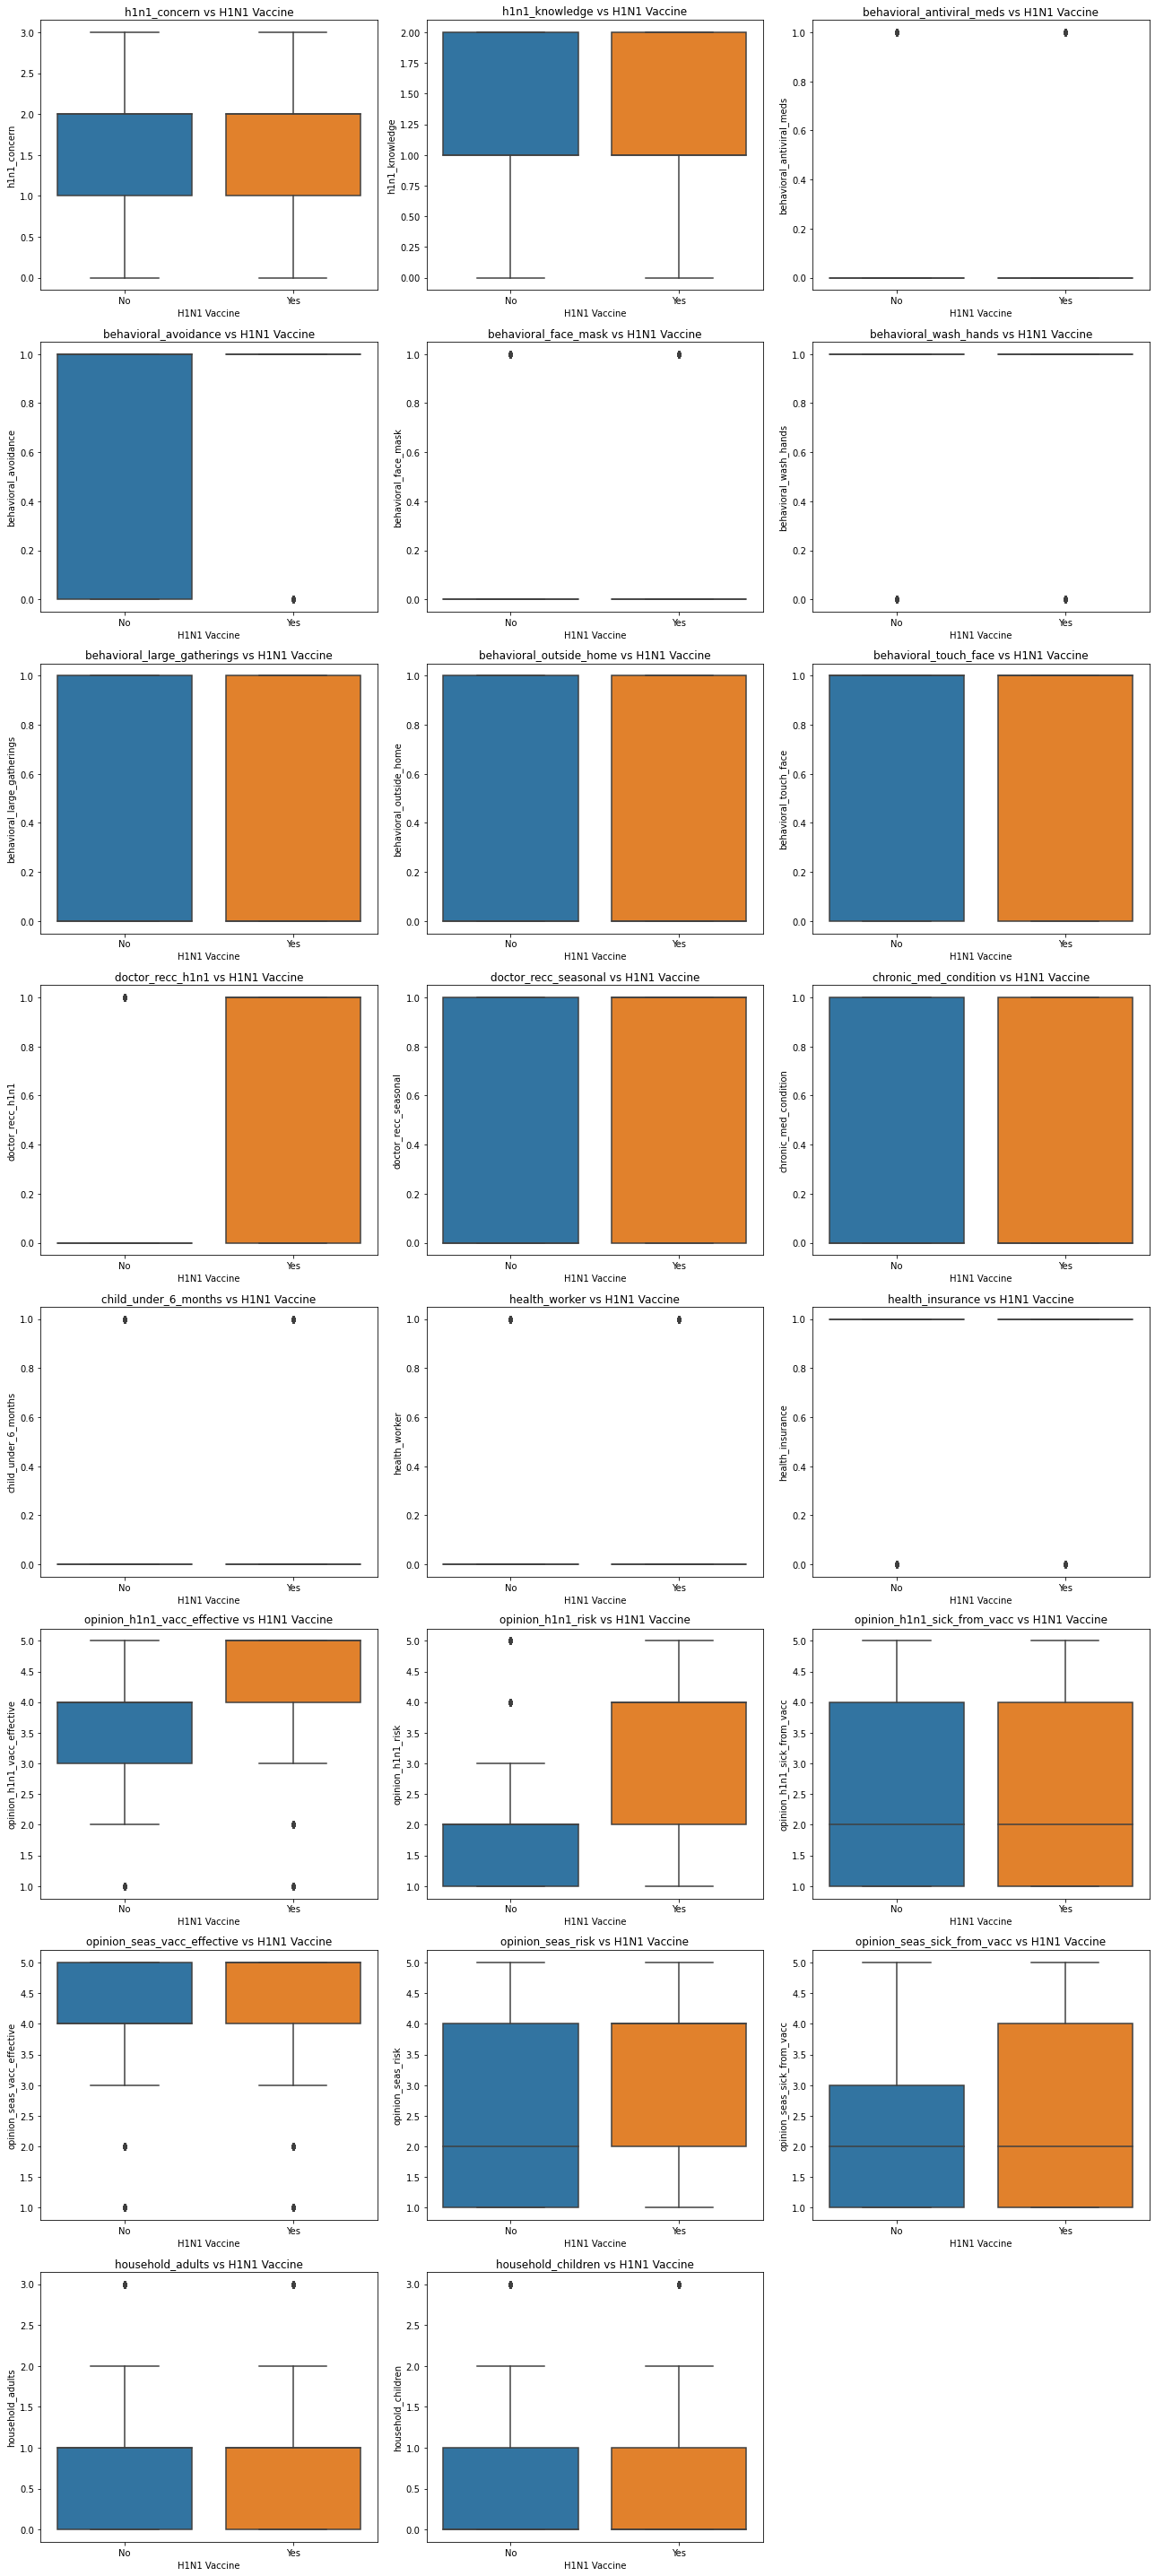

In [88]:
# numerical features
# Number of features per row
cols_per_row = 3
total_features = len(numerical_features)
rows = (total_features + cols_per_row - 1) // cols_per_row

# Create subplot grid
fig, axes = plt.subplots(rows, cols_per_row, figsize=(6 * cols_per_row, 5 * rows))

# Flatten axes array for easy indexing
axes = axes.flatten()

# Plot each numerical feature in a subplot
for i, col in enumerate(numerical_features):
    sns.boxplot(x=merged_df['h1n1_vaccine'], y=col, data=merged_df, ax=axes[i])
    axes[i].set_title(f'{col} vs H1N1 Vaccine')
    axes[i].set_xlabel('H1N1 Vaccine')
    axes[i].set_ylabel(col)
    axes[i].set_xticks([0, 1])
    axes[i].set_xticklabels(['No', 'Yes'])

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


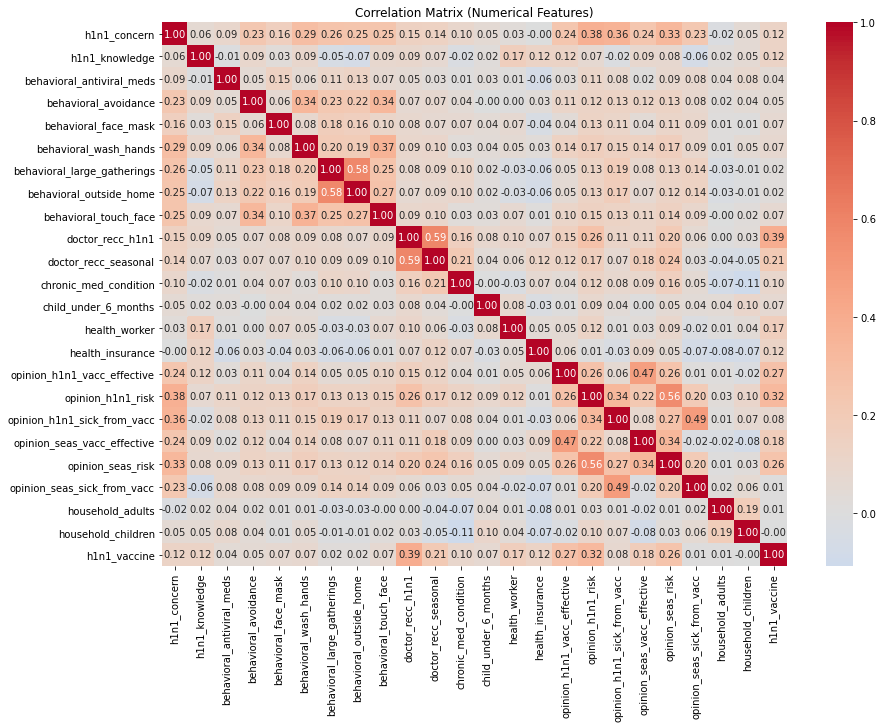

In [89]:
# Select only numerical features (exclude IDs and seasonal vaccine for now)
numeric_features = merged_df.select_dtypes(include=['float64', 'int64']).drop(columns=['respondent_id', 'seasonal_vaccine'])

# Compute correlation matrix
corr_matrix = numeric_features.corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix (Numerical Features)')
plt.show()
